# Objetivo

Feita a Análise Exploratória sobre o dataset, o próximo passo é fazer a modelagem do problema de negócio, para isso, escolhi implementar um modelo de Regressão para Fornecer o melhor preço ao parceiro que deseja utilizar o Airbnb para divulgar a sua propriedade. O intuito com isso é aumentar a aderência de quem aluga assim como oferecer um preço não impeditivo e aumentar a quantidade de bookings.

A metodologia aplicada pra treinar o modelo consiste em 7 etapas:

1. Importar o dataset
2. Verificar e corrigir outilers e valores
3. Dividir o dataset
4. Codificar as variáveis categóricas
5. Normalizar as variáveis numéricas
6. Testar Modelos e Avaliar Métricas
7. Otimizar o Melhor Modelo


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Scripts para mostrar todas as linhas e colunas das tabelas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Script para ignorar 'Warnings'
import warnings
warnings.filterwarnings("always", category=DeprecationWarning)

In [13]:
# Variáveis de configuração
RANDOM_STATE = 42

# 1. Importação do Dataset

In [2]:
# Carregar o dataset uando a função read_excel do pandas
df = pd.read_excel('data.xlsx')

# Mostrar as 5 primeiras linhas do dataset
df.head()

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
0,t,moderate,t,1.0,Western Addition,3776931.0,-12243386.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,1.0,180.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f,strict_14_with_grace_period,f,2.0,Bernal Heights,3774511.0,-12242102.0,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,30.0,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776669.0,-1224525.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776487.0,-12245183.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,f,strict_14_with_grace_period,f,2.0,Western Addition,3777525.0,-12243637.0,House,Entire home/apt,5.0,2022-05-01 00:00:00,2.0,2.0,Real Bed,7.0,27.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Descrevendo o dataset
df.describe()

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
count,7146.000000,7.146000e+03,7.146000e+03,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000
mean,52.604954,3.430809e+06,-1.114719e+07,3.201092,1.342709,1.764484,15.817800,43.553876,96.034285,9.820319,9.699552,9.895886,9.872796,9.719144,9.524349,213.309824,0.000280,0.002939,0.000980,0.198853,0.199412,0.199272,0.199692,0.199132,0.199692,0.199832
std,177.428653,1.033566e+06,3.319669e+06,1.914916,0.932855,1.176789,22.511624,72.538481,6.286139,0.601990,0.703877,0.448704,0.522599,0.659253,0.751603,311.375499,0.016728,0.054134,0.031285,0.399165,0.399586,0.399481,0.399797,0.399376,0.399797,0.399902
min,0.000000,3.772000e+01,-1.225131e+07,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.774272e+06,-1.224408e+07,2.000000,1.000000,1.000000,2.000000,1.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.776318e+06,-1.224227e+07,2.000000,1.000000,1.000000,4.000000,11.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,3.778220e+06,-1.224077e+07,4.000000,2.000000,2.000000,30.000000,54.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1199.000000,3.781031e+06,-1.223900e+02,16.000000,14.000000,14.000000,365.000000,677.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Observando o formato do dataset
df.shape

(7146, 34)

In [7]:
# Variaveis a considerar
vars = [
 #'host_is_superhost',
 'cancellation_policy',
 'instant_bookable',
 'host_total_listings_count',
 'neighbourhood_cleansed',
 #'latitude',
 #'longitude',
 'property_type',
 'room_type',
 'accommodates',
 #'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'minimum_nights',
 #'number_of_reviews',
 #'review_scores_rating',
 #'review_scores_accuracy',
 #'review_scores_cleanliness',
 #'review_scores_checkin',
 #'review_scores_communication',
 #'review_scores_location',
 #'review_scores_value',
 'price',
 #'bedrooms_na',
 #'bathrooms_na',
 #'beds_na',
 #'review_scores_rating_na',
 #'review_scores_accuracy_na',
 #'review_scores_cleanliness_na',
 #'review_scores_checkin_na',
 #'review_scores_communication_na',
 #'review_scores_location_na',
 #'review_scores_value_na'
]

In [8]:
# Criação do dataframe filtrado
df_filtrado = df[vars]

In [9]:
# Observando os tipos de cada coluna
df_filtrado.dtypes

cancellation_policy           object
instant_bookable              object
host_total_listings_count    float64
neighbourhood_cleansed        object
property_type                 object
room_type                     object
accommodates                 float64
bedrooms                     float64
beds                         float64
bed_type                      object
minimum_nights               float64
price                        float64
dtype: object

# 2. Verificar valores faltantes e outliers

In [38]:
for i in df_filtrado.select_dtypes(include=['float64']).columns:
    print(df_filtrado[i].value_counts())

1.0       2650
2.0       1190
3.0        578
4.0        437
5.0        229
852.0      204
6.0        165
165.0      141
8.0         98
439.0       91
87.0        87
7.0         78
41.0        66
35.0        65
64.0        64
10.0        60
53.0        51
12.0        47
14.0        41
44.0        40
9.0         40
67.0        37
31.0        37
37.0        36
1199.0      35
33.0        33
68.0        29
43.0        29
799.0       27
28.0        27
11.0        26
101.0       26
13.0        26
25.0        25
27.0        23
23.0        22
89.0        22
18.0        21
82.0        21
20.0        20
15.0        20
200.0       17
63.0        17
21.0        17
55.0        16
483.0       15
76.0        14
106.0       14
24.0        12
36.0        11
96.0        10
162.0        7
95.0         6
51.0         6
16.0         4
0.0          3
34.0         3
17.0         2
194.0        1
394.0        1
22.0         1
56.0         1
81.0         1
129.0        1
118.0        1
40.0         1
Name: host

In [11]:
# Verificando a quantidade de nulos
df_filtrado.isnull().mean()

cancellation_policy          0.0
instant_bookable             0.0
host_total_listings_count    0.0
neighbourhood_cleansed       0.0
property_type                0.0
room_type                    0.0
accommodates                 0.0
bedrooms                     0.0
beds                         0.0
bed_type                     0.0
minimum_nights               0.0
price                        0.0
dtype: float64

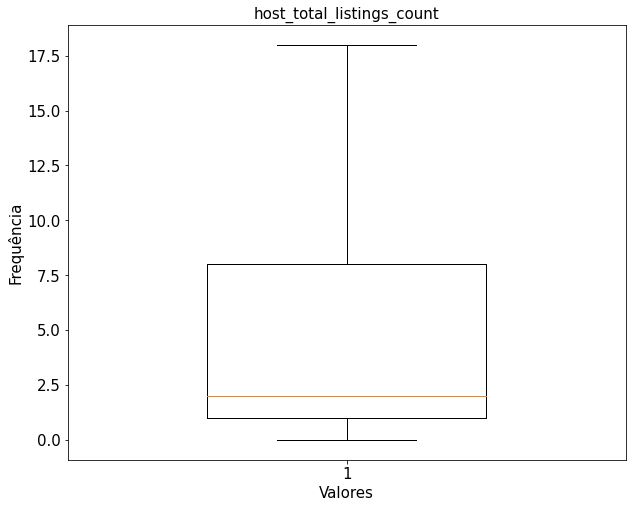

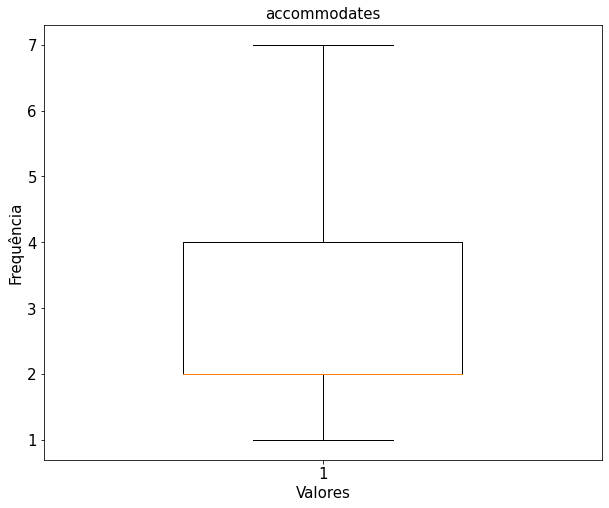

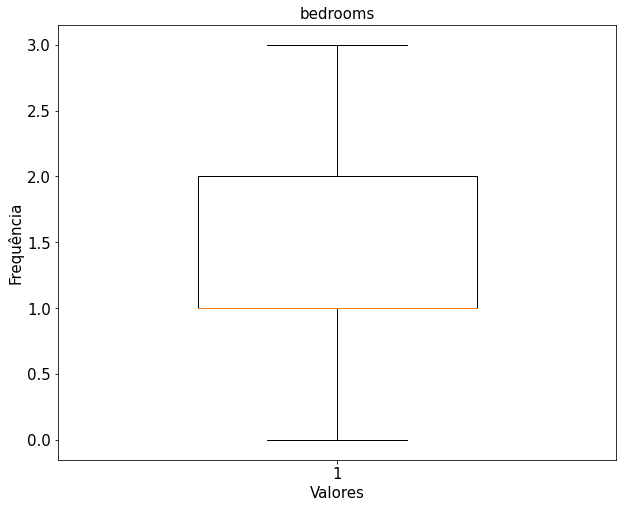

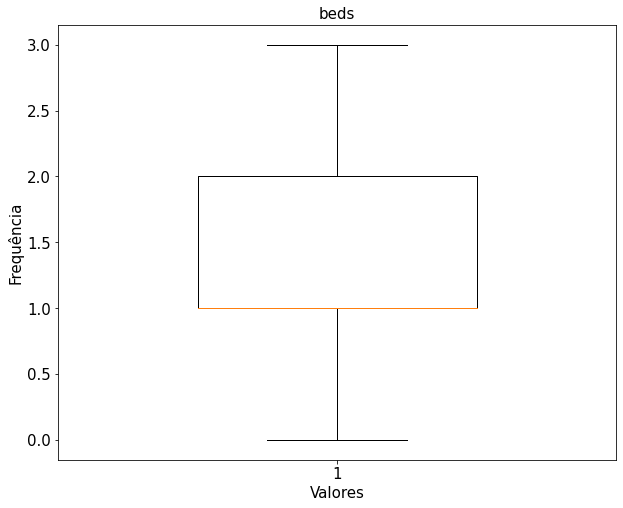

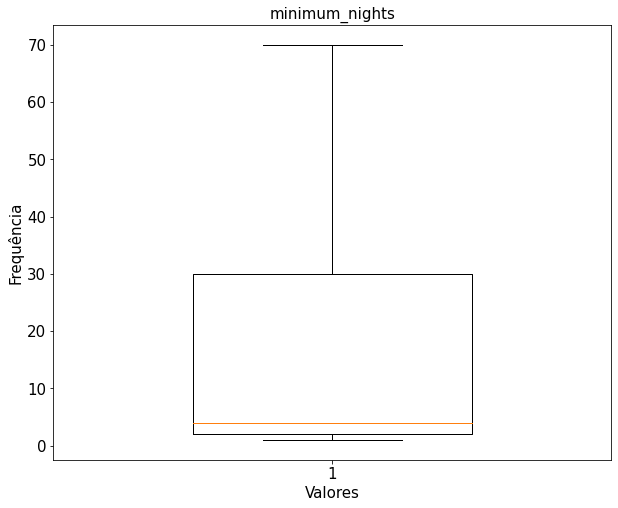

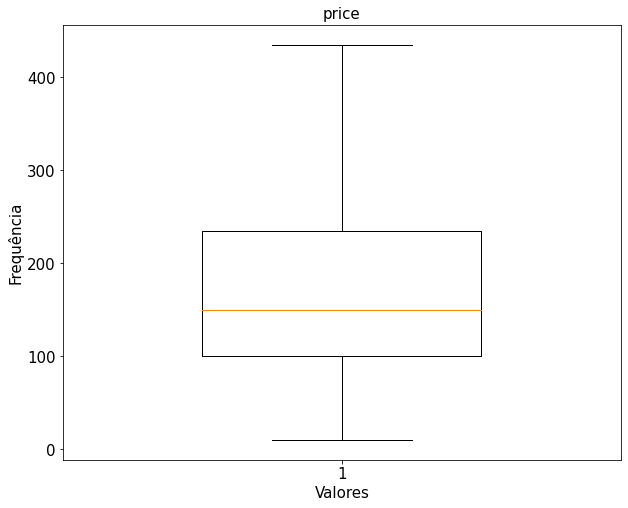

In [12]:
# Verificando os outliers nas variáveis numericas
var_num = list(df_filtrado.select_dtypes(include='float64').columns)

for column in var_num:
    plt.figure(figsize=(10,8))
    plt.boxplot(df_filtrado[column], widths=0.5, showfliers=False)
    plt.title(column, fontsize=15)
    plt.xlabel('Valores', fontsize=15)
    plt.ylabel('Frequência', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

# 3. Dividindo o dataset em treino e teste

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Separando as variáveis dependentes da variável independente
X = df_filtrado.drop('price', axis=1) 
y = df_filtrado['price'] 

# Filtrando as categorias que só possuem 1 listagem
X = X[X['neighbourhood_cleansed'] != 'presidio']
X = X[~X['property_type'].isin(['in_law','Timeshare','Threehouse','Castle','Earth house','Boat'])]
y = y[X.index] # Dropando as linhas correspondentes em y

# Separando os datasets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)

# 4. Codificar as variáveis categóricas

Para codificar as variáveis categóricas, optamos pela categorização pela taxa de probabilidade

In [51]:
from category_encoders import TargetEncoder

# Separar as features categóricas e numéricas
cat_features = X_train.select_dtypes(include=['object'])
num_features = X_train.select_dtypes(include=['float64'])

def probability_ratio_encoding(X_train, X_test, target_train, cat_features, alpha=1):
    """
    Essa função codifica variáveis categóricas com codificação de proporção de probabilidade.
    """
    # Dicionário para armazenar a proporção de probabilidade de cada coluna categórica
    prob_ratio_dict = {}

    # Calcular a proporção de probabilidade para cada coluna categórica
    for col in cat_features:
        numerador = target_train.groupby(X_train[col]).mean() # Média da coluna target agrupada pela coluna categórica
        denominador = target_train.mean() # Média da coluna target
        prob_ratio = numerador / denominador # Proporção de probabilidade
        prob_ratio_dict[col] = prob_ratio

    # Copiar os dados de treinamento e teste
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    
    # Substituir as colunas categóricas pelas proporções de probabilidade correspondentes
    for col in cat_features:
        X_train_encoded[col] = X_train[col].map(prob_ratio_dict[col]).fillna(0)
        X_test_encoded[col] = X_test[col].map(prob_ratio_dict[col]).fillna(0)
    
    # Retornar os dados codificados
    return X_train_encoded, X_test_encoded

# Aplicar a codificação de proporção de probabilidade nas features categóricas
X_train_encoded, X_test_encoded = probability_ratio_encoding(X_train, X_test, y_train, cat_features)


In [56]:
X_train_encoded.head(10)

,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,minimum_nights
4636,0.847317,1.016720,87.0,0.813459,0.922964,1.261407,2.0,0.0,1.0,1.003222,30.0
5863,0.847317,0.972405,439.0,1.014792,0.922964,1.261407,2.0,0.0,1.0,1.003222,30.0
3884,0.915422,1.016720,3.0,0.981092,1.045848,0.605086,2.0,1.0,1.0,1.003222,7.0
6706,1.115980,0.972405,1.0,1.102425,0.922964,1.261407,6.0,2.0,2.0,1.003222,2.0
2259,1.115980,1.016720,2.0,0.981092,0.728396,1.261407,7.0,1.0,4.0,1.003222,1.0
7116,0.847317,0.972405,6.0,0.847092,1.045848,0.605086,2.0,1.0,1.0,1.003222,30.0
4317,0.915422,0.972405,2.0,1.223607,0.922964,0.605086,2.0,1.0,1.0,1.003222,2.0
3872,0.915422,0.972405,1.0,0.880669,1.045848,1.261407,2.0,1.0,1.0,1.003222,2.0
2579,1.115980,0.972405,3.0,1.366747,1.384932,1.261407,4.0,2.0,4.0,1.003222,30.0
3751,1.115980,0.972405,1199.0,1.014792,0.922964,1.261407,2.0,1.0,1.0,1.003222,30.0


In [55]:
X_test_encoded.head(10)

,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,minimum_nights
3028,1.115980,1.016720,5.0,0.662945,1.045848,1.261407,4.0,1.0,3.0,1.003222,30.0
5275,0.847317,0.972405,37.0,1.373424,0.862952,0.605086,2.0,1.0,2.0,1.003222,2.0
6888,1.115980,0.972405,6.0,0.580300,1.045848,1.261407,16.0,5.0,9.0,1.003222,1.0
696,0.915422,0.972405,1.0,0.919556,0.922964,1.261407,1.0,0.0,1.0,1.003222,30.0
1424,1.115980,0.972405,13.0,0.981092,0.922964,0.605086,2.0,1.0,1.0,1.003222,30.0
1288,1.115980,1.016720,1.0,0.974849,1.045848,1.261407,6.0,3.0,4.0,1.003222,3.0
3040,1.115980,1.016720,2.0,1.850192,0.862952,0.605086,2.0,1.0,1.0,1.003222,1.0
764,1.115980,1.016720,1.0,0.919556,1.384932,1.261407,4.0,2.0,2.0,1.003222,6.0
1562,1.115980,1.016720,1.0,1.850192,1.384932,1.261407,5.0,3.0,3.0,1.003222,7.0
1386,1.115980,1.016720,2.0,1.004057,1.045848,1.261407,5.0,3.0,3.0,1.003222,2.0


# 5. Normalização das variáveis

In [60]:
from sklearn.preprocessing import StandardScaler

# Criando o Scaler
scaler = StandardScaler()

# Aplicar o Scaler ao dateset de treino codificado
scaler.fit(X_train_encoded)

# Transformar os datasets de treino e teste codificados
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_test.columns)

In [62]:
X_train_scaled.head(10)

,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,minimum_nights
0,-0.501317,0.778401,0.183646,-0.707043,-0.374879,0.800299,-0.624650,-1.449663,-0.642378,0.071446,0.632086
1,-0.501317,-1.284685,2.141757,0.056066,-0.374879,0.800299,-0.624650,-1.449663,-0.642378,0.071446,0.632086
2,-0.277701,0.778401,-0.283630,-0.071666,0.223108,-1.209034,-0.624650,-0.366040,-0.642378,0.071446,-0.392120
3,0.380807,-1.284685,-0.294756,0.388219,-0.374879,0.800299,1.464357,0.717583,0.211271,0.071446,-0.614773
4,0.380807,0.778401,-0.289193,-0.071666,-1.321697,0.800299,1.986608,-0.366040,1.918568,0.071446,-0.659304
5,-0.501317,-1.284685,-0.266942,-0.579564,0.223108,-1.209034,-0.624650,-0.366040,-0.642378,0.071446,0.632086
6,-0.277701,-1.284685,-0.289193,0.847531,-0.374879,-1.209034,-0.624650,-0.366040,-0.642378,0.071446,-0.614773
7,-0.277701,-1.284685,-0.294756,-0.452298,0.223108,0.800299,-0.624650,-0.366040,-0.642378,0.071446,-0.614773
8,0.380807,-1.284685,-0.283630,1.390073,1.873182,0.800299,0.419854,0.717583,1.918568,0.071446,0.632086
9,0.380807,-1.284685,6.369496,0.056066,-0.374879,0.800299,-0.624650,-0.366040,-0.642378,0.071446,0.632086


In [63]:
X_test_scaled.head(10)

,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,minimum_nights
0,0.380807,0.778401,-0.272505,-1.277532,0.223108,0.800299,0.419854,-0.366040,1.064920,0.071446,0.632086
1,-0.501317,-1.284685,-0.094495,1.415381,-0.666910,-1.209034,-0.624650,-0.366040,0.211271,0.071446,-0.614773
2,0.380807,-1.284685,-0.266942,-1.590780,0.223108,0.800299,6.686872,3.968453,6.186812,0.071446,-0.659304
3,-0.277701,-1.284685,-0.294756,-0.304906,-0.374879,0.800299,-1.146901,-1.449663,-0.642378,0.071446,0.632086
4,0.380807,-1.284685,-0.228002,-0.071666,-0.374879,-1.209034,-0.624650,-0.366040,-0.642378,0.071446,0.632086
5,0.380807,0.778401,-0.294756,-0.095329,0.223108,0.800299,1.464357,1.801206,1.918568,0.071446,-0.570242
6,0.380807,0.778401,-0.289193,3.222464,-0.666910,-1.209034,-0.624650,-0.366040,-0.642378,0.071446,-0.659304
7,0.380807,0.778401,-0.294756,-0.304906,1.873182,0.800299,0.419854,0.717583,0.211271,0.071446,-0.436650
8,0.380807,0.778401,-0.294756,3.222464,1.873182,0.800299,0.942105,1.801206,1.064920,0.071446,-0.392120
9,0.380807,0.778401,-0.289193,0.015377,0.223108,0.800299,0.942105,1.801206,1.064920,0.071446,-0.614773


# 6. Treinando e Avaliando os modelos

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definir os modelos a serem testados
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), GradientBoostingRegressor(), xgb.XGBRegressor()]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Gradient Boosting Regression', 'XGBoost Regression']

# Treinar e testar os modelos
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcular as métricas de performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Mostrar os resultados
    print(f"{model} MAE: {mae:.2f}")
    print(f"{model} MSE: {mse:.2f}")
    print(f"{model} MAPE: {mape:.2f}%\n")

LinearRegression() MAE: 99.27
LinearRegression() MSE: 111219.03
LinearRegression() MAPE: 51.84%

Ridge() MAE: 99.27
Ridge() MSE: 111216.35
Ridge() MAPE: 51.83%

Lasso() MAE: 98.65
Lasso() MSE: 111018.58
Lasso() MAPE: 51.57%

ElasticNet() MAE: 94.42
ElasticNet() MSE: 109600.96
ElasticNet() MAPE: 50.67%

GradientBoostingRegressor() MAE: 86.01
GradientBoostingRegressor() MSE: 115989.90
GradientBoostingRegressor() MAPE: 39.44%

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs

XGBRegressor tem o menor Erro Absoluto Médio Percentual, logo será o modelo escolhido

# 7. Otimizando o Modelo XGBRegressor

In [86]:
from sklearn.model_selection import RandomizedSearchCV

# Inicializar o modelo XGBR
xgb_reg = xgb.XGBRegressor()

# Definir o espaço dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]
}

# Executar o grid search estocástico usando RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_reg, param_grid, n_iter=600, cv=8, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Obter os melhores parâmetros
best_params = random_search.best_params_

# Treinar o modelo com os melhores parâmetros
xgb_reg = xgb.XGBRegressor(n_estimators=best_params['n_estimators'], 
                       learning_rate=best_params['learning_rate'],
                       max_depth=best_params['max_depth'],
                       min_child_weight=best_params['min_child_weight'],
                       subsample=best_params['subsample'],
                       gamma=best_params['gamma'],
                       colsample_bytree=best_params['colsample_bytree'])
xgb_reg.fit(X_train_scaled, y_train)

Fitting 8 folds for each of 600 candidates, totalling 4800 fits


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [90]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.01,
 'gamma': 0.3,
 'colsample_bytree': 0.6}

In [87]:
y_pred = xgb_reg.predict(X_test_scaled)
    
# Calcular as métricas para o melhor modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar resultados
print(f"Modelo otimizado - MAE: {mae:.2f}")
print(f"Modelo otimizado - MSE: {mse:.2f}")
print(f"Modelo otimizado - MAPE: {mape:.2f}%\n")

Modelo otimizado - MAE: 76.20
Modelo otimizado - MSE: 107684.16
Modelo otimizado - MAPE: 30.26%



Com a otimização, houve uma melhoria de 8% no MAPE, o que representa uma melhoria significativa na performance

In [89]:
# Criando o dataset para mensuração]
X_mensuracao = X_test
X_mensuracao['price'] = y_test
X_mensuracao['price_pred'] = y_pred

X_mensuracao.to_csv('mensuracao.csv')

In [91]:
X_mensuracao.head()

,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,minimum_nights,price,price_pred
3028,strict_14_with_grace_period,f,5.0,Outer Sunset,House,Entire home/apt,4.0,1.0,3.0,Real Bed,30.0,64.0,122.284782
5275,flexible,t,37.0,Financial District,Boutique hotel,Private room,2.0,1.0,2.0,Real Bed,2.0,300.0,145.616501
6888,strict_14_with_grace_period,t,6.0,Excelsior,House,Entire home/apt,16.0,5.0,9.0,Real Bed,1.0,599.0,1187.859985
696,moderate,t,1.0,Mission,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,30.0,125.0,102.378113
1424,strict_14_with_grace_period,t,13.0,Inner Richmond,Apartment,Private room,2.0,1.0,1.0,Real Bed,30.0,70.0,83.218117


# 6. Visando a produtização do modelo

In [94]:
import pickle

# Armazenar o modelo em um pkl

# Em ambiente de homologação
with open("xgb_reg.pkl", "wb") as f:
    pickle.dump(xgb_reg, f)

In [96]:
# Com o modelo salvo, basta transferir o pkl gerado para o ambiente de produção e retreinar o modelo

# Em ambiente de Produção
with open("xgb_reg.pkl", "rb") as f:
    xgb_reg = pickle.load(f)

y_pred = xgb_reg.predict(X_test_scaled)